The CDC publishes firearm mortality for each State per 100,000 persons https://www.cdc.gov/nchs/pressroom/sosmap/firearm_mortality/firearm.htm. Each State' firearm control laws can be categorized as very strict to very lax. The purpose of this Story is to answer the question, " Do stricter firearm control laws help reduce firearm mortality?"
For this assignment you will need to:



*  Access the firearm mortality data from the CDC using an available API (https://open.cdc.gov/apis.html)
*  Create a 5 point Likert scale categorizing gun control laws from most lax to strictest and assign each state to the most appropriate Likert bin.

*  Determine wether stricter gun control laws result in reduced gun violence deaths
*   Present your story using  heat maps







In [100]:
import requests
import json
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates


# Read Firearm dataset from 2018 - 2021

In [101]:
fad = pd.read_csv("https://raw.githubusercontent.com/nnaemeka-git/global-datasets/main/firearm_death.txt", sep='\t')

In [102]:
fad

,Notes,State,State Code,Deaths,Population,Crude Rate
0,NaN,Alabama,1.0,4596.0,19752465.0,23.3
1,NaN,Alaska,2.0,691.0,2932814.0,23.6
2,NaN,Arizona,4.0,4913.0,29148080.0,16.9
3,NaN,Arkansas,5.0,2524.0,12088042.0,20.9
4,NaN,California,6.0,13010.0,157675182.0,8.3
...,...,...,...,...,...,...
80,"on April 2010 Census, released by the Census B...",NaN,NaN,NaN,NaN,NaN
81,http://wonder.cdc.gov/wonder/help/ucd-expanded...,NaN,NaN,NaN,NaN,NaN
82,2. The population figures used in the calculat...,NaN,NaN,NaN,NaN,NaN
83,resident population that is under one year of ...,NaN,NaN,NaN,NaN,NaN


In [103]:
fad.columns

Index(['Notes', 'State', 'State Code', 'Deaths', 'Population', 'Crude Rate'], dtype='object')

In [104]:
fad = fad.drop(['Notes','State Code','Crude Rate','Population'], axis=1)
fad = fad[0:51]
fad.head()


,State,Deaths
0,Alabama,4596.0
1,Alaska,691.0
2,Arizona,4913.0
3,Arkansas,2524.0
4,California,13010.0


In [105]:
fad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   State   51 non-null     object 
 1   Deaths  51 non-null     float64
dtypes: float64(1), object(1)
memory usage: 944.0+ bytes


# Read Firearm dataset of 2021

# The analysis was based on 2021 deaths by firearm

In [106]:
fad2 = pd.read_csv("https://raw.githubusercontent.com/nnaemeka-git/global-datasets/main/data-table.csv", sep=",")

In [107]:
fad2.head()

,State,Death Rate,Number of Deaths
0,Alabama,26.4,"1,315"
1,Alaska,25.2,182
2,Arizona,18.3,"1,365"
3,Arkansas,23.3,698
4,California,9.0,"3,576"


In [108]:
fad2['Number of Deaths'] = fad2['Number of Deaths'].str.replace(',', '').astype(float)

In [109]:
fad2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             50 non-null     object 
 1   Death Rate        50 non-null     float64
 2   Number of Deaths  50 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


In [110]:
fad = pd.merge(fad,fad2,on='State')
fad.reset_index(drop=True, inplace=True)
fad.sort_index(inplace=True)
fad.sort_values('State',ascending = False,inplace=True)
fad.head()

,State,Deaths,Death Rate,Number of Deaths
49,Wyoming,566.0,26.1,155.0
48,Wisconsin,2712.0,13.5,793.0
47,West Virginia,1287.0,17.3,319.0
46,Washington,3411.0,11.2,896.0
45,Virginia,4482.0,14.3,1248.0


In [111]:
fad.shape

(50, 4)

#Fetch Gun Law Ranking

In [112]:
df = pd.read_html("https://sightmark.com/blogs/news/states-ranked-by-how-strict-their-gun-laws-are")

In [113]:
df = df[0]
df.head()

,0,1,2
0,Rank,State,Number of Gun Safety Policies Adopted
1,1,California,45
2,2,Illinois,42
3,2,New York,42
4,4,Connecticut,41


In [114]:
df.columns = df.iloc[0]
df = df[1:]

In [115]:
df.head()

,Rank,State,Number of Gun Safety Policies Adopted
1,1,California,45
2,2,Illinois,42
3,2,New York,42
4,4,Connecticut,41
5,4,Hawaii,41


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 1 to 50
Data columns (total 3 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Rank                                   50 non-null     object
 1   State                                  50 non-null     object
 2   Number of Gun Safety Policies Adopted  50 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB


In [117]:
df['Rank'] = df['Rank'].astype(int)
df['Number of Gun Safety Policies Adopted'] = df['Number of Gun Safety Policies Adopted'].astype(float)

<ipython-input-117-ea369fef278b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rank'] = df['Rank'].astype(int)
<ipython-input-117-ea369fef278b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Number of Gun Safety Policies Adopted'] = df['Number of Gun Safety Policies Adopted'].astype(float)


In [118]:
#View unique ranks
df.Rank.unique()

array([ 1,  2,  4,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 22,
       24, 26, 29, 30, 34, 36, 37, 38, 39, 44, 45, 50])

def condition(x):
    if x<=10:
        return "strictest"
    elif x>10 and x<=20:
        return "strict"
    elif x>20 and x<=30:
      return "moderate"
    elif x>30 and x<=40:
      return "lax"
    else:
        return 'most lax'

In [119]:
# Defining all the conditions inside a function
def condition(x):
    if x<=10:
        return '5'
    elif x>10 and x<=20:
        return '4'
    elif x>20 and x<=30:
      return '3'
    elif x>30 and x<=40:
      return '2'
    elif x>40:
      return '1'

In [120]:
df['Likert scale'] = df['Rank'].apply(condition)
df.head()

<ipython-input-120-b8429f6b4760>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Likert scale'] = df['Rank'].apply(condition)


,Rank,State,Number of Gun Safety Policies Adopted,Likert scale
1,1,California,45.0,5
2,2,Illinois,42.0,5
3,2,New York,42.0,5
4,4,Connecticut,41.0,5
5,4,Hawaii,41.0,5


In [121]:
df = pd.merge(fad,df,on='State')
df.reset_index(drop=True, inplace=True)
df.sort_index(inplace=True)
df.sort_values('State',ascending = False,inplace=True)
df.head()

,State,Deaths,Death Rate,Number of Deaths,Rank,Number of Gun Safety Policies Adopted,Likert scale
0,Wyoming,566.0,26.1,155.0,45,4.0,1
1,Wisconsin,2712.0,13.5,793.0,22,15.0,3
2,West Virginia,1287.0,17.3,319.0,30,11.0,3
3,Washington,3411.0,11.2,896.0,9,33.0,5
4,Virginia,4482.0,14.3,1248.0,14,27.0,4


In [122]:
df.isnull().sum()

State                                    0
Deaths                                   0
Death Rate                               0
Number of Deaths                         0
Rank                                     0
Number of Gun Safety Policies Adopted    0
Likert scale                             0
dtype: int64

#Mean Death by Likert scale

In [123]:
meanDeath = df.groupby(['Likert scale']).mean()['Number of Deaths']
meanDeath

<ipython-input-123-419fa4a0aa2f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  meanDeath = df.groupby(['Likert scale']).mean()['Number of Deaths']


Likert scale
1     676.000000
2     719.900000
3    1271.333333
4     990.272727
5    1056.500000
Name: Number of Deaths, dtype: float64

In [124]:
#Export Dataset to google drive

path = '/content/drive/MyDrive/DATA 608/Assignment 3/gun_law.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  df.to_csv(f)

In [125]:
dff = df.reset_index()
df.head()

,State,Deaths,Death Rate,Number of Deaths,Rank,Number of Gun Safety Policies Adopted,Likert scale
0,Wyoming,566.0,26.1,155.0,45,4.0,1
1,Wisconsin,2712.0,13.5,793.0,22,15.0,3
2,West Virginia,1287.0,17.3,319.0,30,11.0,3
3,Washington,3411.0,11.2,896.0,9,33.0,5
4,Virginia,4482.0,14.3,1248.0,14,27.0,4


In [126]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   index                                  50 non-null     int64  
 1   State                                  50 non-null     object 
 2   Deaths                                 50 non-null     float64
 3   Death Rate                             50 non-null     float64
 4   Number of Deaths                       50 non-null     float64
 5   Rank                                   50 non-null     int64  
 6   Number of Gun Safety Policies Adopted  50 non-null     float64
 7   Likert scale                           50 non-null     object 
dtypes: float64(4), int64(2), object(2)
memory usage: 3.2+ KB


In [127]:
dff['Likert scale'] = df['Likert scale'].astype(float)

In [128]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   index                                  50 non-null     int64  
 1   State                                  50 non-null     object 
 2   Deaths                                 50 non-null     float64
 3   Death Rate                             50 non-null     float64
 4   Number of Deaths                       50 non-null     float64
 5   Rank                                   50 non-null     int64  
 6   Number of Gun Safety Policies Adopted  50 non-null     float64
 7   Likert scale                           50 non-null     float64
dtypes: float64(5), int64(2), object(1)
memory usage: 3.2+ KB


# Display Heat map

<ipython-input-129-82eab9eec717>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = dff.pivot("State", "Likert scale", "Likert scale")


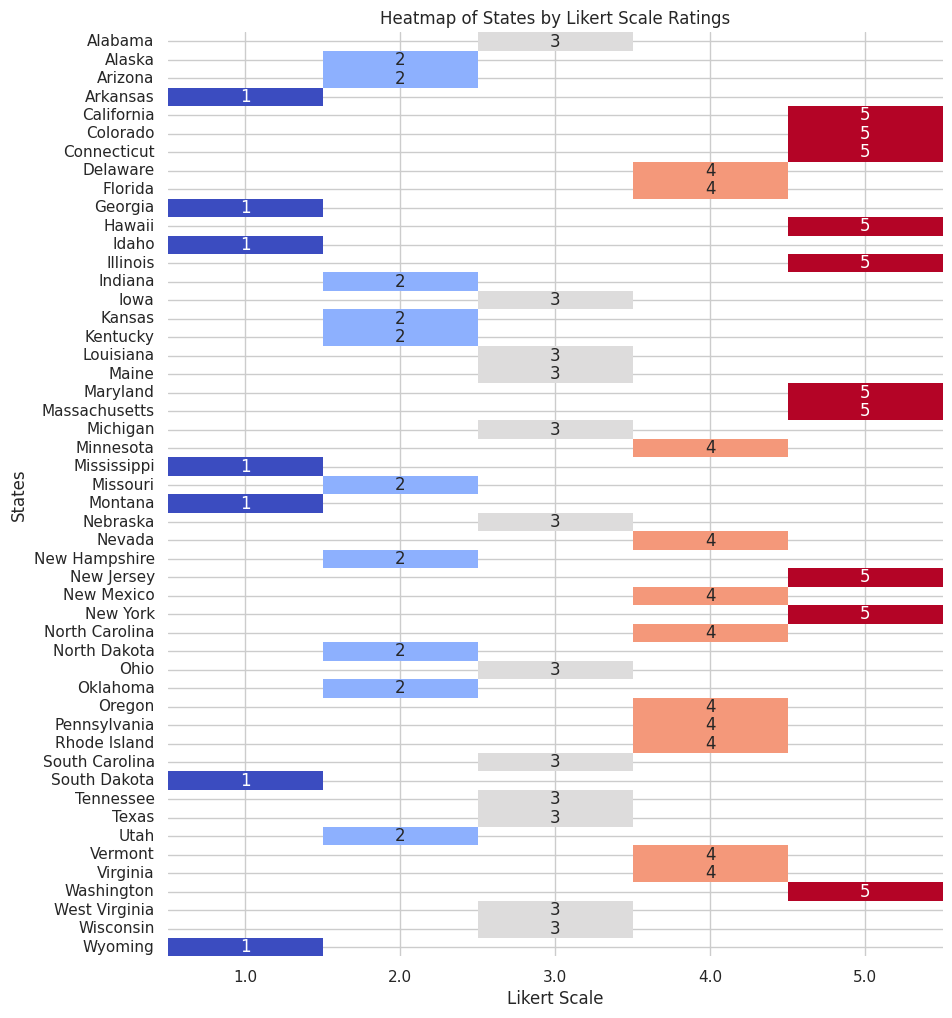

In [129]:
# Setting the figure size
plt.figure(figsize=(10, 12))

# Creating a pivot table for the heatmap. Since we only have one Likert scale value per state,
# we don't need to aggregate the data.
pivot_table = dff.pivot("State", "Likert scale", "Likert scale")

# Creating the heatmap
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", cbar=False, fmt="g")

# Adding labels and a title
plt.title('Heatmap of States by Likert Scale Ratings')
plt.xlabel('Likert Scale')
plt.ylabel('States')

plt.show()

Here is the heatmap visualizing the states by their Likert scale ratings. Each state is represented on the y-axis, and the Likert scale ratings are on the x-axis. The color intensity indicates the Likert scale rating for each state, providing a clear visualization of how each state is rated according to the dataset provided.

# Display Scatter plot to show relationship between Number of Gun Safety Policies Adopted and Death Rate

In [130]:
# Convert the Likert scale to an ordered categorical type with a logical order
df['Likert scale'] = pd.Categorical(df['Likert scale'], categories=['1', '2', '3', '4', '5'], ordered=True)

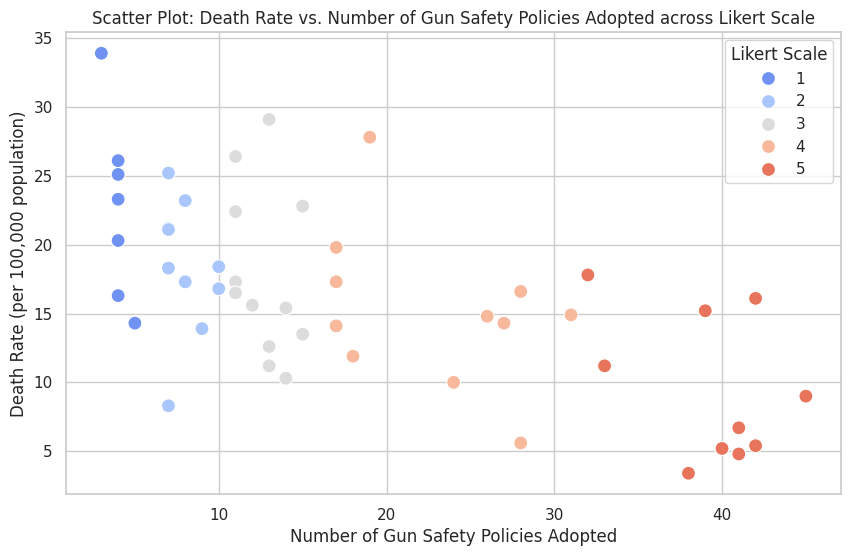

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=df, x='Number of Gun Safety Policies Adopted', y='Death Rate', hue='Likert scale', palette='coolwarm', s=100)

# Enhancing the plot
plt.title('Scatter Plot: Death Rate vs. Number of Gun Safety Policies Adopted across Likert Scale')
plt.xlabel('Number of Gun Safety Policies Adopted')
plt.ylabel('Death Rate (per 100,000 population)')
plt.legend(title='Likert Scale')

# Show the plot
plt.show()


The scatter plot above illustrates the relationship between the Death Rate (per 100,000 population) and the Number of Gun Safety Policies Adopted by different states, differentiated by their Likert scale values. Each point represents a state, with its position indicating the number of gun safety policies adopted and the corresponding death rate. The color of the points indicates the Likert scale value, suggesting a qualitative assessment or categorization related to gun safety policies.

# Correlation Between Number of Gun Safety Policies Adopted and Death Rate

In [132]:
# Calculate the correlation between the number of gun safety policies adopted and firearm mortality measures
correlation_death_rate = df['Number of Gun Safety Policies Adopted'].corr(df['Death Rate'])


correlation_death_rate

-0.6325010884414499

# Correlation Between Number of Gun Safety Policies Adopted and Number of Deaths

In [133]:
correlation_number_of_deaths = df['Number of Gun Safety Policies Adopted'].corr(df['Number of Deaths'])

correlation_number_of_deaths

0.08080251292109594

# Display Scatter plot to show relationship between Likert scale and Death Rate

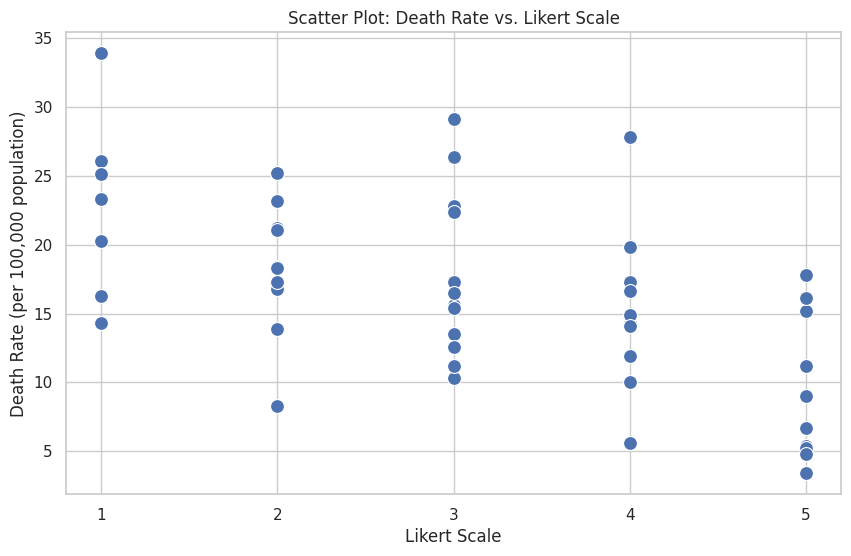

In [134]:
# Create a scatter plot for Death Rate vs. Likert Scale
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=df, x='Likert scale', y='Death Rate', s=100)

# Enhancing the plot
plt.title('Scatter Plot: Death Rate vs. Likert Scale')
plt.xlabel('Likert Scale')
plt.ylabel('Death Rate (per 100,000 population)')

# Show the plot
plt.show()


The scatter plot above shows the relationship between the Death Rate (per 100,000 population) and the Likert scale values across different states. Each point represents a state, with its position indicating the Likert scale value and the corresponding death rate. This visualization helps to explore if there's any apparent trend or pattern between the qualitative assessments (Likert scale values) and the death rates

The number of death is not enough to judge if strict gun law determines reduce firearm mortality. Population, and other factors contribute. states with higr mortality rates have strictest hu lswers